In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-nose for beef quality monitoring dataset.csv')

# Display basic dataset information
print("Dataset Overview:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute       4553 non-null   int64  
 1   class        4553 non-null   object 
 2   TVC          4553 non-null   float64
 3   MQ135        4553 non-null   float64
 4   MQ136        4553 non-null   float64
 5   MQ2          4553 non-null   float64
 6   MQ3          4553 non-null   float64
 7   MQ4          4553 non-null   float64
 8   MQ5          4553 non-null   float64
 9   MQ6          4553 non-null   float64
 10  MQ7          4553 non-null   float64
 11  MQ8          4553 non-null   float64
 12  MQ9          4553 non-null   float64
 13  Humidity     4553 non-null   float64
 14  Temperature  4553 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 533.7+ KB
Dataset Overview:
 None

First 5 Rows:
    minute  class       TVC  MQ135  MQ136    MQ2    MQ3    MQ4    MQ5   MQ6

In [3]:
# Separate features and target
X = data.drop(columns=['minute','class','MQ136','MQ5','MQ3','MQ4','MQ8'])
y = data['class']

In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [9]:
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Results:
Accuracy: 1.0
Confusion Matrix:
 [[136   0]
 [  0 775]]
Classification Report:
               precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       136
     spoiled       1.00      1.00      1.00       775

    accuracy                           1.00       911
   macro avg       1.00      1.00      1.00       911
weighted avg       1.00      1.00      1.00       911



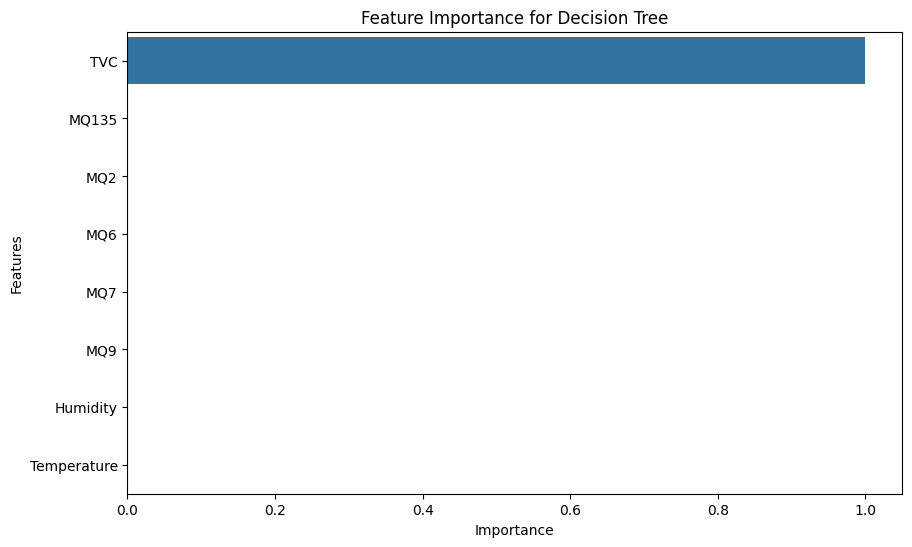

In [12]:
feature_importances_rf = dt_model.feature_importances_


features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=features)
plt.title("Feature Importance for Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [13]:
import os
save_dir = r'/content/drive/MyDrive/Colab Notebooks'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_path = os.path.join(save_dir, 'decision_tree_model.pkl')

# Save the trained model
joblib.dump(dt_model, file_path)
print(f"\nModel saved at: {file_path}")


Model saved at: /content/drive/MyDrive/Colab Notebooks/decision_tree_model.pkl
